# Cinemática

Rama de las física que estudia el movimiento prescindiendo de las fuerzas que lo producen.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

## Cálculo de la velocidad y aceleración

Las cantidades de la cinemática estan definidas en funcion de la derivada temporal de la posición de un objeto, en coordenadas cartesianas **$x$** o en coordenas angulares **$\theta$**. Expresemos estas cantidades en tiempos discretos **$t_i$**.

In [13]:
''' 
Definamos un intervalo de tiempo.
Dividiendo el tiempo en un rango de 20 intervarlos entre 0 y 1
'''



tmax = 1.0
tmin = 0.0
intervals = 20

dt = (tmax-tmin)/intervals
nt = intervals+1
time = np.arange(nt)*dt

In [14]:
#Array para la posición
x = np.zeros(nt)

In [15]:
#Movimiento oscilatorio

x[0:nt]=np.sin(2*np.pi*time[0:nt])

La **velocidad** y la **aceleración** se definen como la primera y la segunda derivada de la posición respecto al tiempo, respectivamente. En un contexto de discretización temporal, estas derivadas pueden aproximarse utilizando diferencias finitas.

### Velocidad: Diferencias Finitas

La velocidad se puede calcular como:  
$$ v(t) = \frac{dx(t)}{dt} \approx \frac{x_i - x_{i-1}}{\Delta t} $$

Esta fórmula corresponde a una **diferencia hacia atrás (backward difference)**, ya que utiliza el valor actual (\(x_i\)) y el anterior (\(x_{i-1}\)), retrocediendo en el tiempo.

Por otro lado, la **diferencia hacia adelante (forward difference)** utiliza el valor actual y el siguiente (\(x_{i+1}\)) para aproximar la derivada, avanzando en el tiempo:  
$$ \frac{dx(t)}{dt} \approx \frac{x_{i+1} - x_i}{\Delta t} $$

La definición más natural de la derivada es la **diferencia centrada (centered difference)**, que calcula la derivada como el promedio entre las diferencias hacia adelante y hacia atrás. Esto la hace más precisa y simétrica:  
$$ \frac{dx(t)}{dt} \approx \frac{x_{i+1} - x_{i-1}}{2\Delta t} $$

---

### Aceleración: Segunda Derivada

La aceleración puede definirse como la primera derivada de la velocidad o, directamente, como la segunda derivada de la posición respecto al tiempo. Utilizando la **diferencia centrada**, se obtiene:  
$$
\frac{d^2 x(t)}{dt^2} \approx \frac{x(t_{i+1}) - 2x(t_i) + x(t_{i-1})}{(\Delta t)^2}
$$

Este enfoque es simétrico y compacto, ideal para cálculos en mallas temporales discretas. 



In [16]:
dxdtForward = np.zeros(nt)
dxdtBackward = np.zeros(nt)
dxdtCentered = np.zeros(nt)

In [17]:
dxdtForward[0:nt-1]=(x[1:nt]-x[0:nt-1])/dt
dxdtBackward[1:nt] = (x[1:nt]-x[0:nt-1])/dt

dxdtCentered[1:nt-1]=0.5*(dxdtForward[1:nt-1]+dxdtBackward[1:nt-1])

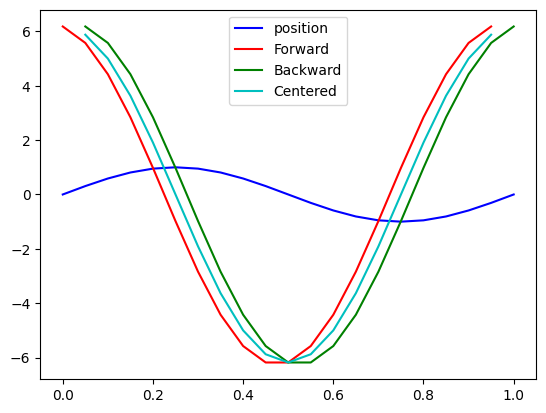

In [18]:

plt.plot(time,x,color='b',label='position')
plt.plot(time[0:nt-1], dxdtForward[0:nt-1], color='r', label='Forward')
plt.plot(time[1:nt], dxdtBackward[1:nt], color='g', label='Backward')
plt.plot(time[1:nt-1], dxdtCentered[1:nt-1], color='c', label='Centered')
plt.legend(loc = 'upper center')
plt.show()

In [19]:
d2xdt2 = ( x[0:nt-2] - 2*x[1:nt-1] + x[2:nt] ) / dt**2

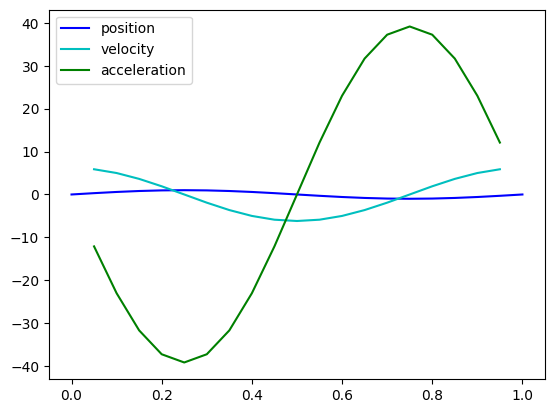

In [20]:
plt.plot(time,x,color='b',label='position')
plt.plot(time[1:nt-1],dxdtCentered[1:nt-1],color='c',label='velocity')
plt.plot(time[1:nt-1],d2xdt2,'g',label='acceleration')
plt.legend(loc='upper left')
plt.show()

## Integración de la aceleración

Cuando conocemos la aceleración, podemos obtener las velocidad con una primera intregración y entonces la posición con una segunda integración. Consideremos el problema de un objeto tirado verticalmente hacia arriba con una velocidad $v_0$ y una posición inicial $y_0=0$ bajo la aceleración de la gravedad $a=-g=-9.8m/s^2$.

In [54]:
time = np.arange(nt)*dt

In [55]:
# Definimos la aceleración en un array

acc = np.ones(nt)* (-9.8)#m/s²

In [56]:
vel = np.zeros(nt)
vel[0] = 5.0 #m/s

In [57]:
for it in np.arange(nt-1):
    vel [it+1] = vel[it]+acc[it]*dt

In [58]:
#Aproximación por adelante
pos = np.zeros(nt)
pos[0] = 0.0 #m
for it in np.arange(nt-1):
    pos[it+1] = pos[it] + vel[it]*dt

In [59]:
#Velocidad promedio
posAve = np.zeros(nt)
velAverage = 0.5 * ( vel[0:nt-1] + vel[1:nt])
for it in np.arange(nt-1):
    posAve[it+1] = posAve[it] + velAverage[it]*dt

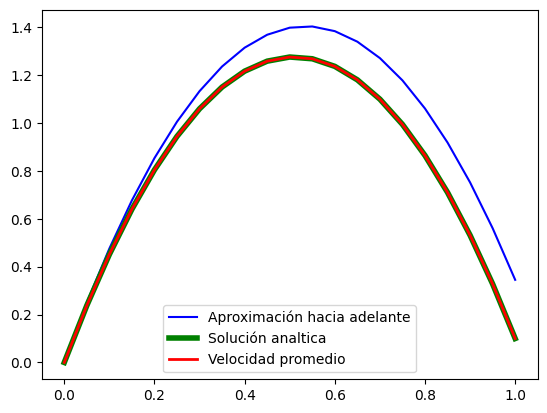

In [61]:
plt.plot(time,pos,color='b',label='Aproximación hacia adelante')
plt.plot(time,-0.5*9.8*time**2+5.0*time,linewidth=4,color='g',label='Solución analtica')
plt.plot(time,posAve,color='r',linewidth=2,label='Velocidad promedio')
plt.legend(loc='lower center')
plt.show()

**Posición vs. tiempo de un objeto lanzado con una velocidad inicial de $v_0 = 5m/s$**. Se emplean dos técnicas para integrar la posición y se comparan los resultados con la solución analítica. Una de las integraciones se basa en una **aproximación hacia adelante**, en la cual la velocidad para todo el intervalo de tiempo es igual a la velocidad inicial. La segunda asume el valor de la **velocidad en el punto medio del intervalo**. La gráfica muestra que la aproximación utilizando el valor en el punto medio es muy superior. De hecho, es tan precisa que la trayectoria numérica resulta indistinguible de la solución analítica.

## Trayectoria de un proyectil

La trayectoria de un proyectil es la ruta que un cuerpo sigue cuando ha sido lanzado. Puede ser representada en un sistema coordinado. Típicamente, el eje horizontal x representa la distancia que el objeto viaja (en dirección x) y el eje vertical y representa la altura (en dirección y) del tiro. Asumiendo una aceleración de la gravedad constante **$g$** orientada hacia la dirección negativa de y, la trayectoria dependera de la velocidad inicial **$v$**.


Si $( v_0 )$ es la velocidad inicial y $( \theta )$ es el ángulo de lanzamiento, entonces:  

- $ v_{x0} = v_0 \cos(\theta) $  
- $ v_{y0} = v_0 \sin(\theta) $  

In [23]:
theta=np.pi/6
v0=10.0 #m/s
gx=0.0
gy=-10.0 #m/s2
ax = np.ones(nt) * gx
ay = np.ones(nt) * gy
vx = np.zeros(nt)
vy = np.zeros(nt)
vx[0]=v0*np.cos(theta)
vy[0]=v0*np.sin(theta)

In [24]:
for it in np.arange(nt-1):
    vx[it+1] = vx[it]+ax[it]*dt
    vy[it+1] = vy[it]+ay[it]*dt

In [26]:
px = np.zeros(nt)
py = np.zeros(nt)
# Promedios de velocidades
vxAverage = 0.5 * (vx[0:nt - 1] + vx[1:nt])
vyAverage = 0.5 * (vy[0:nt - 1] + vy[1:nt])
for it in np.arange(nt-1):
    px[it+1] = px[it] + vxAverage[it]*dt
    py[it+1] = py[it] + vyAverage[it]*dt

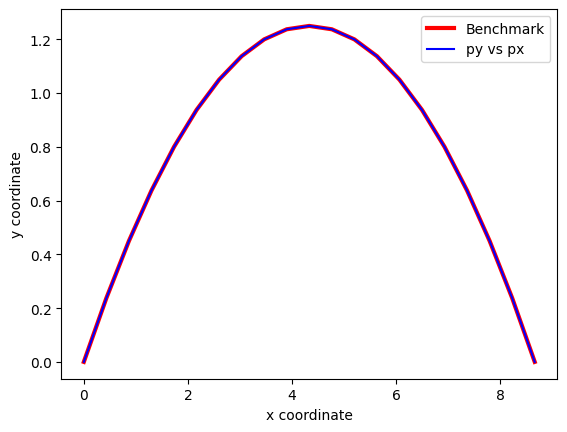

In [30]:
pxBench=v0*np.cos(theta)*time
pyBench=v0*np.sin(theta)*time-0.5*10.0*time**2
plt.xlabel('x coordinate');plt.ylabel('y coordinate');
plt.plot(pxBench, pyBench, color='r', label='Benchmark',linewidth=3)
plt.plot(px, py, color='b', label='py vs px')
plt.legend()
plt.show()

## Movimiento circular

Consideremos un objeto en una orbita circular alrededor de la Tierra. Esta trayectoria se mantendra estable si la aceleración centripeta $v^2/r$ es igual a la aceleración de la gravedad $g$, por ejemplo si $v=\sqrt{gr}$.

In [37]:
tmin = 0.0; tmax = 2*np.pi
intervals = 100
dt = (tmax-tmin) / intervals
nt = intervals + 1
time = np.arange(nt) * dt

In [38]:
x = np.sin(time); y = np.cos(time)


In [39]:
dxdt=(x[1:nt]-x[0:nt-1])/dt
dydt=(y[1:nt]-y[0:nt-1])/dt
d2xdt2=(x[0:nt-2]-2*x[1:nt-1]+x[2:nt])/dt**2
d2ydt2=(y[0:nt-2]-2*y[1:nt-1]+y[2:nt])/dt**2

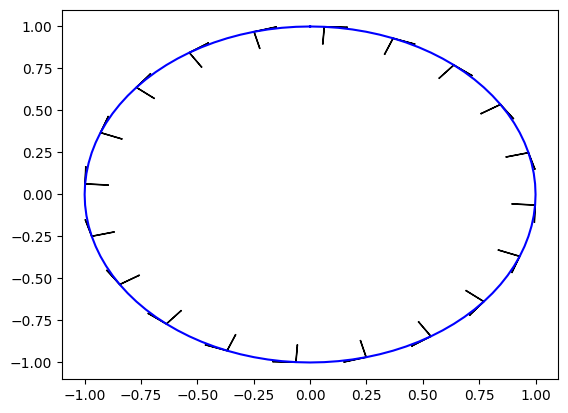

In [42]:
numArrows = 20
aLen = 0.1 # length of one arrow
for it in np.arange(0,nt-1,nt/numArrows,dtype=int):
    plt.arrow(x[it+1], y[it+1], dxdt[it]*aLen, dydt[it]*aLen,fc='g')
    plt.arrow(x[it+1], y[it+1], d2xdt2[it]*aLen, d2ydt2[it]*aLen,fc='r')

plt.plot(x,y,'b',label='position')

plt.show()